# Final Excercise
Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [0]:
import tensorflow as tf
import os
import zipfile
from os import path, getcwd, chdir

# DO NOT CHANGE THE LINE BELOW. If you are developing in a local
# environment, then grab happy-or-sad.zip from the Coursera Jupyter Notebook
# and place it inside a local folder and edit the path to that location
path = f"{getcwd()}/../tmp2/happy-or-sad.zip"

zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

os.listdir('/tmp/h-or-s')  # print the subfolders of this folder

['sad', 'happy']

In [0]:
# Directory with our training sad pictures
train_sad_dir = '/tmp/h-or-s/sad'
train_sad_names = os.listdir(train_sad_dir)

# Directory with our training happy pictures
train_happy_dir = '/tmp/h-or-s/happy'
train_happy_names = os.listdir(train_happy_dir)

# Print the lengths of sad and happy
len(train_sad_names), len(train_happy_names)

(40, 40)

<Figure size 1152x1152 with 0 Axes>

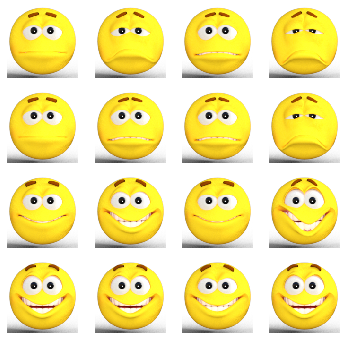

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4
# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
plt.figure(figsize=(6,6))

pic_index += 8
next_sad_pix = [os.path.join(train_sad_dir, fname) 
                     for fname in train_sad_names[pic_index-8:pic_index]]
next_happy_pix = [os.path.join(train_happy_dir, fname) 
                     for fname in train_happy_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_sad_pix+next_happy_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

In [0]:
######################### check the size of an image ################################################
import cv2
im = cv2.imread('/tmp/h-or-s/sad/sad1-18.png')  
im.shape

(150, 150, 3)

In [0]:
######################### create image data generator ###############################################
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        # Your Code Here    
        '/tmp/h-or-s/',            # This is the source directory for training images
        target_size=(150, 150),    # All images will be resized to 150x150
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 80 images belonging to 2 classes.


In [0]:
######################### This Code Block should Define and Compile the Model ########################

model = tf.keras.models.Sequential([
    # Your Code Here
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('happy') and 1 for the other ('sad')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

W1018 14:37:58.919328 139628855527232 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1018 14:37:59.307916 139628855527232 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
######################### start training the model #################################################
class myCallback(tf.keras.callbacks.Callback):
    # Your Code
    def on_epoch_end(self, epoch, logs={}):
         if(logs.get('acc')>0.999):
            print("\nReached {}% accuracy so cancelling training!".format(0.990*100))
            self.model.stop_training = True
            
#create callback
mycallback = myCallback()
# This code block should call model.fit_generator and train for
# a number of epochs. 
history = model.fit_generator(
        # Your Code Here
        train_generator,
        steps_per_epoch=2,  
        epochs=20,
        verbose=1,
        callbacks=[mycallback])

Epoch 1/20
2/2 [==============================] - 0s 20ms/step - loss: 0.4964 - acc: 0.7500
Epoch 2/20
2/2 [==============================] - 0s 52ms/step - loss: 0.1939 - acc: 0.9500
Epoch 3/20
2/2 [==============================] - 0s 51ms/step - loss: 0.1044 - acc: 0.9500
Epoch 4/20
1/2 [==============>...............] - ETA: 0s - loss: 0.1173 - acc: 1.0000
Reached 99.0% accuracy so cancelling training!
2/2 [==============================] - 0s 50ms/step - loss: 0.0669 - acc: 1.0000


In [0]:
# The Expected output: "Reached 99.9% accuracy so cancelling training!""
history.history['acc'][-1]

1.0